In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
pd.Timestamp.today()

Timestamp('2023-11-09 03:28:36.403031')

In [6]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/bangkok_aqi.csv'
df=pd.read_csv(url,parse_dates=['date'])
df

,date,pm25,pm10,o3,no2,so2,co
0,2017-01-01,NaN,30.0,18.0,9.0,1.0,NaN
1,2017-01-02,85.0,36.0,12.0,12.0,1.0,NaN
2,2017-01-03,104.0,40.0,11.0,12.0,1.0,NaN
3,2017-01-04,109.0,58.0,13.0,15.0,1.0,NaN
4,2017-01-05,126.0,52.0,9.0,13.0,1.0,NaN
...,...,...,...,...,...,...,...
1111,2020-01-20,164.0,68.0,19.0,14.0,1.0,NaN
1112,2020-01-21,148.0,64.0,17.0,15.0,1.0,NaN
1113,2020-01-22,124.0,57.0,13.0,9.0,NaN,NaN
1114,2020-01-23,115.0,44.0,10.0,8.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1116 non-null   datetime64[ns]
 1   pm25    1111 non-null   float64       
 2   pm10    1111 non-null   float64       
 3   o3      1111 non-null   float64       
 4   no2     1111 non-null   float64       
 5   so2     885 non-null    float64       
 6   co      1 non-null      float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.2 KB


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.805269,0.597712,0.611152,0.056936,NaN
pm10,0.805269,1.000000,0.680192,0.755497,0.086692,NaN
o3,0.597712,0.680192,1.000000,0.576186,0.065927,NaN
no2,0.611152,0.755497,0.576186,1.000000,0.066964,NaN
so2,0.056936,0.086692,0.065927,0.066964,1.000000,NaN
co,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [10]:
df[['pm25', 'pm10', 'o3', 'no2', 'so2']].corr()

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [11]:
dcorr=df[['pm25', 'pm10', 'o3', 'no2', 'so2']].corr()
dcorr

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [14]:
dcorr.style.background_gradient()

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [15]:
dcorr.style.background_gradient(cmap='Reds')

,pm25,pm10,o3,no2,so2
pm25,1.000000,0.805269,0.597712,0.611152,0.056936
pm10,0.805269,1.000000,0.680192,0.755497,0.086692
o3,0.597712,0.680192,1.000000,0.576186,0.065927
no2,0.611152,0.755497,0.576186,1.000000,0.066964
so2,0.056936,0.086692,0.065927,0.066964,1.000000


In [16]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html', width=800, height=400)

In [18]:
dcorr.style.format('{:.2f}')

,pm25,pm10,o3,no2,so2
pm25,1.00,0.81,0.60,0.61,0.06
pm10,0.81,1.00,0.68,0.76,0.09
o3,0.60,0.68,1.00,0.58,0.07
no2,0.61,0.76,0.58,1.00,0.07
so2,0.06,0.09,0.07,0.07,1.00


In [19]:
dcorr.style.background_gradient(cmap='Reds').format('{:.2f}')

,pm25,pm10,o3,no2,so2
pm25,1.00,0.81,0.60,0.61,0.06
pm10,0.81,1.00,0.68,0.76,0.09
o3,0.60,0.68,1.00,0.58,0.07
no2,0.61,0.76,0.58,1.00,0.07
so2,0.06,0.09,0.07,0.07,1.00


<Axes: >

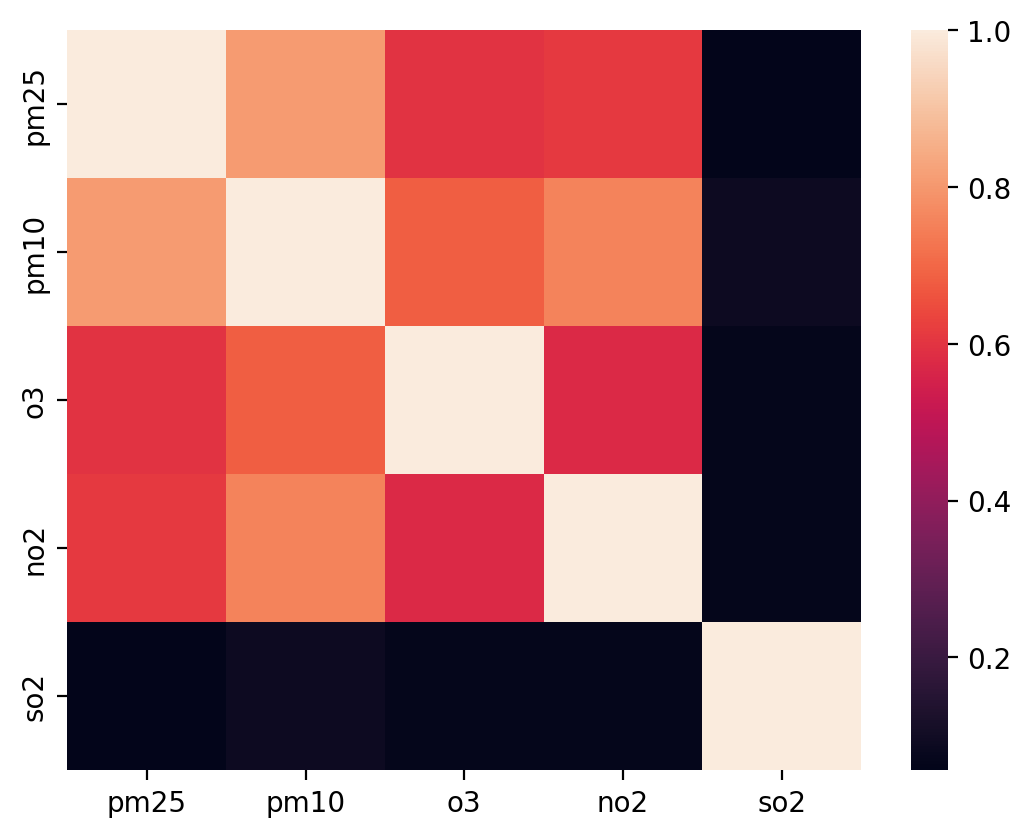

In [20]:
sns.heatmap(dcorr)

<Axes: >

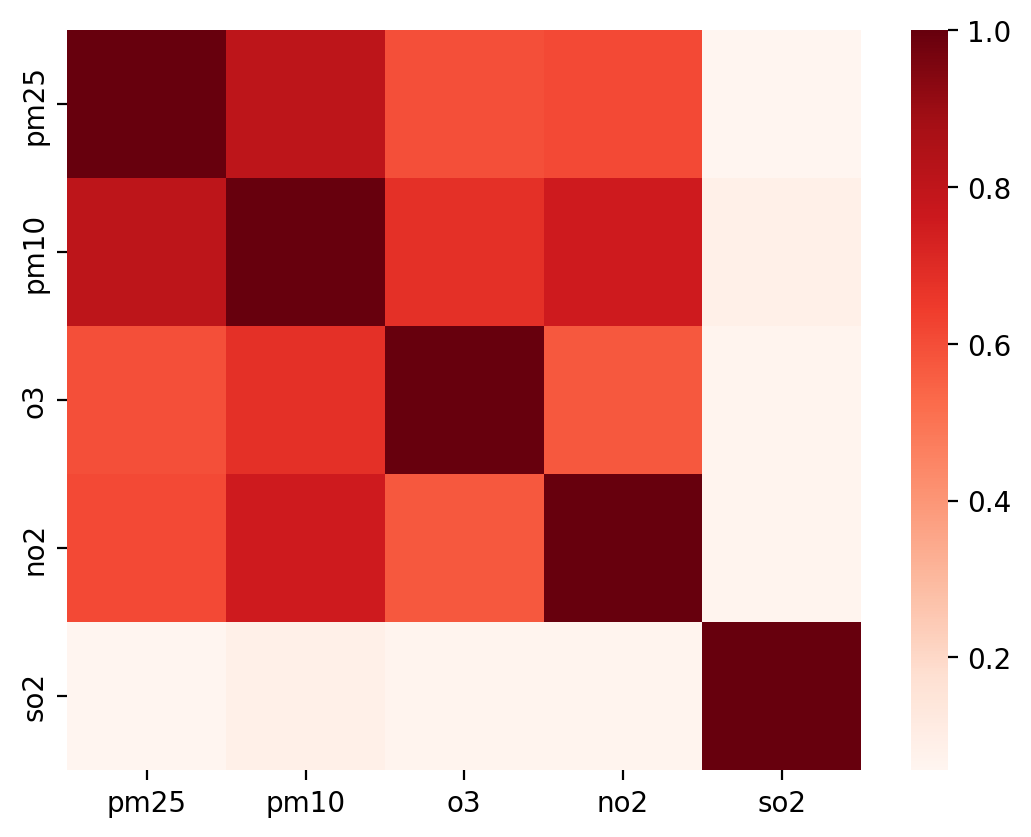

In [22]:
sns.heatmap(dcorr,cmap='Reds')

<Axes: >

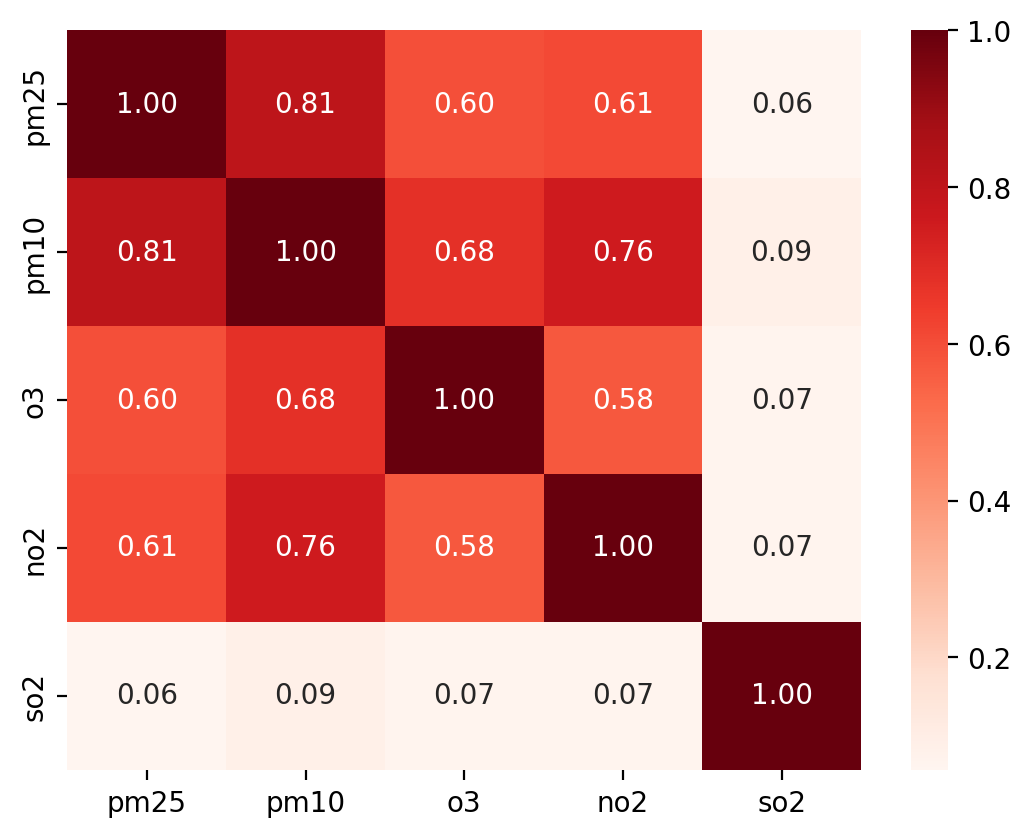

In [24]:
sns.heatmap(dcorr,cmap='Reds',annot=True,fmt='.2f')

In [40]:
mask=np.zeros_like(dcorr)
mask

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [41]:
mask[np.triu_indices_from(mask)]=True #Mask triu ครึ่งบน หาก tril จะ mask ครึ่งล่าง
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

<Axes: >

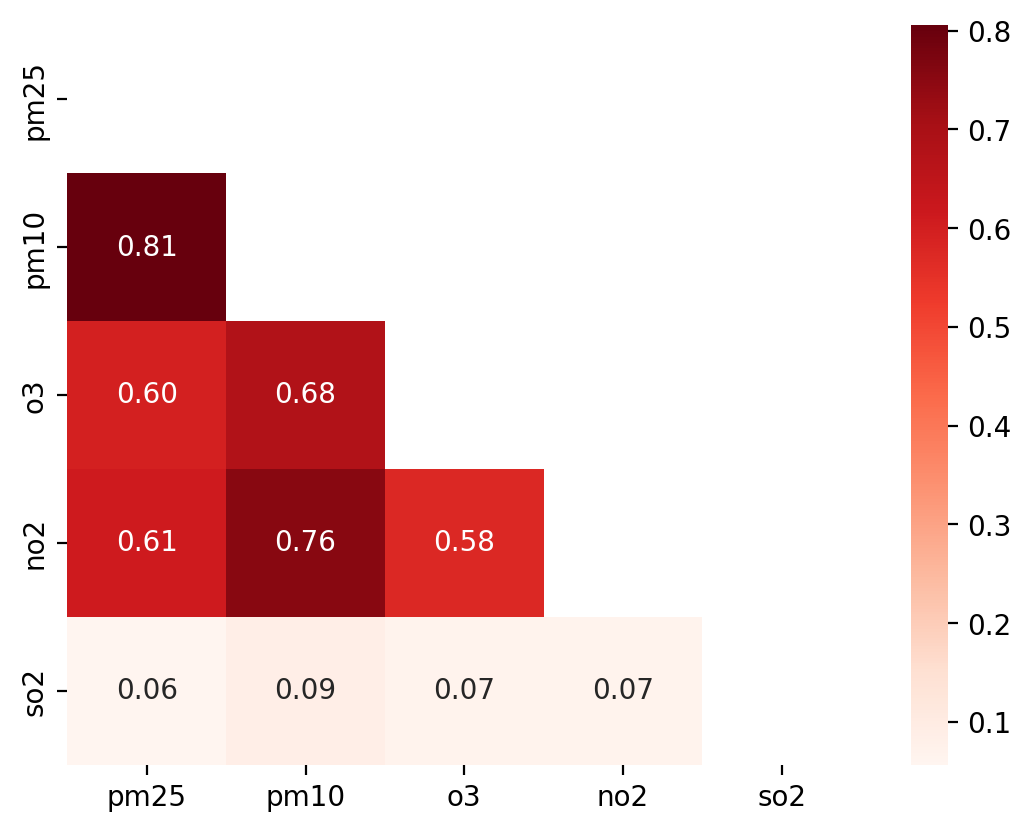

In [42]:
sns.heatmap(dcorr,cmap='Reds',annot=True,fmt='.2f',mask=mask)